### Project Goal:
The Autocorrect model is programmed to correct spelling mistakes and find the most similar related words while text is being entered. The comparison between the words written on the keyboard and those in the vocabulary dictionary is entirely dependent on NLP. The autocorrect feature assumes you typed the correct term if the word you entered can be found in a dictionary. As it demonstrates, if the word doesn't exist, the application finds the words that are the closest matches in the history of our smartphone.

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import textdistance
import re
from collections import Counter

#### Using words to apply the functionality utilizing the text from the book:- A tale of two cities

In [5]:
# Words in the book are added as a list in words
words=[]
with open('/Dataset/A Tale of Two Cities.txt','r',encoding='utf-8') as f:
    file_data=f.read()
    file_data=file_data.lower()
    words=re.findall('\w+',file_data)

In [15]:
word_set=set(words)
word_set

{'occasions',
 'instruments',
 'began',
 'knew',
 'daring',
 'desperation',
 'raggedly',
 'tuileries',
 'small',
 'converse',
 'bed',
 'faults',
 'supreme',
 'errors',
 'ligatures',
 'mangled',
 'inconsistencies',
 'proposed',
 'goodness',
 'whistled',
 'pattern',
 'getting',
 'rustling',
 'despite',
 'insensible',
 'droll',
 'secretly',
 'inexperienced',
 'diversified',
 'inasmuch',
 'sustained',
 'll',
 'sword',
 'gallop',
 'betwixt',
 'conducive',
 'catechist',
 'abyss',
 'movement',
 'abstraction',
 'profit',
 'temper',
 'weathers',
 'sobbing',
 'fare',
 'understand',
 'laudable',
 'estrangement',
 'smokeless',
 'descends',
 'blunt',
 'code',
 'hush',
 'empties',
 'bewildered',
 'overshadowed',
 'plunges',
 'fan',
 'horizontal',
 'fagots',
 'ral',
 'seeming',
 'petrified',
 'correctly',
 'clouds',
 'smotherings',
 'meanwhile',
 'swallow',
 'glances',
 'idlest',
 'cracking',
 'dressed',
 'sea',
 'contrasting',
 'commissioned',
 'imagination',
 'remonstrated',
 'owners',
 'stubbornne

#### Finding the frequency of the words in the list

In [14]:
word_freq_dict={}
word_freq_dict=Counter(words)
word_freq_dict.most_common()[:10]

[('the', 8242),
 ('and', 5067),
 ('of', 4142),
 ('to', 3653),
 ('a', 3016),
 ('in', 2663),
 ('it', 2082),
 ('his', 2008),
 ('i', 1972),
 ('that', 1950)]

#### Probability of occurence of each words: Relative frequency of words

In [26]:
prob={}
sum_word=sum(word_freq_dict.values())
for i in word_freq_dict.keys():
    prob[i]=word_freq_dict[i]/sum_word

#### Finding Similar Words using Jaccard Distance

Jaccard distance is used to find the similarity between two sets given as d(x,y)=1-SIM(x,y) where SIM(x,y):Jaccard Similarity which measures the closeness between the two sets.
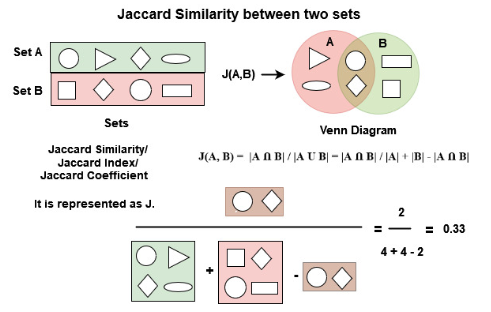

In [27]:
def autocorrect(input_word):
    input_word=input_word.lower()
    if input_word in word_set:
        return('Correct word')
    else:
        sim=[1-textdistance.Jaccard(qval=2).distance(word_set,input_word) for word_set in word_freq_dict.keys()]
        df=pd.DataFrame.from_dict(prob,orient='index')
        df=df.rename(columns={'index':'word',0:'Prob'})
        df['Similarity']=sim
        output=df.sort_values(['Similarity','Prob'],ascending=False).head()
        return(output)

#### Displaying similar words for the argument passed

In [31]:
autocorrect('cits')

,Prob,Similarity
its,0.001574,0.666667
city,0.000268,0.500000
sits,0.000014,0.500000
fits,0.000007,0.500000
suits,0.000007,0.400000
